In [27]:
import numpy
import pandas

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor


import matplotlib.pyplot as plt
import pandas as pd


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

seed = 8
numpy.random.seed(seed)

In [28]:
salary=pd.read_csv('/content/SalaryDataTest(1).csv')
salary=pd.read_csv('/content/SalaryDataTrain(1).csv')

In [29]:
salary.drop(["workclass","education","maritalstatus","occupation","relationship","race","sex","native","Salary"],axis=1, inplace = True)

In [31]:
salary.value_counts()
salary.isnull().sum()
salary.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [32]:
print("Head:", salary.head())

Head:    age  educationno  capitalgain  capitalloss  hoursperweek
0   39           13         2174            0            40
1   50           13            0            0            13
2   38            9            0            0            40
3   53            7            0            0            40
4   28           13            0            0            40


In [33]:
print("Statistical Description:", salary.describe())

Statistical Description:                 age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000


In [34]:
print("Shape:", salary.shape)

Shape: (30161, 5)


In [35]:
print("Data Types:", salary.dtypes)

Data Types: age             int64
educationno     int64
capitalgain     int64
capitalloss     int64
hoursperweek    int64
dtype: object


In [36]:
print("Correlation:", salary.corr(method='pearson'))

Correlation:                    age  educationno  capitalgain  capitalloss  hoursperweek
age           1.000000     0.043525     0.080152     0.060278      0.101598
educationno   0.043525     1.000000     0.124416     0.079691      0.152522
capitalgain   0.080152     0.124416     1.000000    -0.032218      0.080431
capitalloss   0.060278     0.079691    -0.032218     1.000000      0.052454
hoursperweek  0.101598     0.152522     0.080431     0.052454      1.000000


In [37]:
dataset = salary.values


X = dataset[:,0:9]
Y = dataset[:,2]

In [38]:
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  3
Selected Features:  [ True  True  True False False]
Feature Ranking:  [1 1 1 3 2]


(array([  511.,  1877.,  1995., 16581.,  3004.,  3736.,  1721.,   421.,
          184.,   131.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

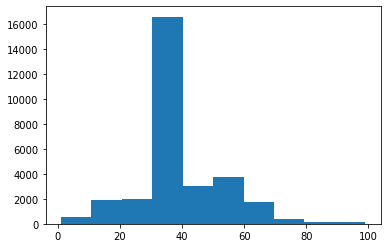

In [39]:
plt.hist((salary.hoursperweek))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f24a26050>,
      dtype=object)

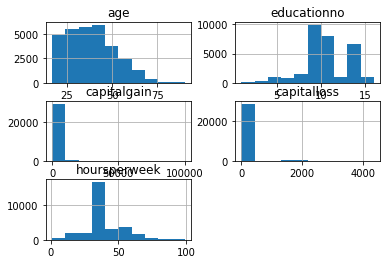

In [40]:
salary.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f2431d410>,
      dtype=object)

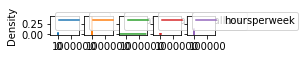

In [41]:
salary.plot(kind='density', subplots=True, layout=(10,10), sharex=True, sharey=True)

age               AxesSubplot(0.125,0.821923;0.0596154x0.0580769)
educationno     AxesSubplot(0.196538,0.821923;0.0596154x0.0580...
capitalgain     AxesSubplot(0.268077,0.821923;0.0596154x0.0580...
capitalloss     AxesSubplot(0.339615,0.821923;0.0596154x0.0580...
hoursperweek    AxesSubplot(0.411154,0.821923;0.0596154x0.0580...
dtype: object

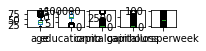

In [42]:
salary.plot(kind='box', subplots=True, layout=(11,11), sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f16f90290>,
      dtype=object)

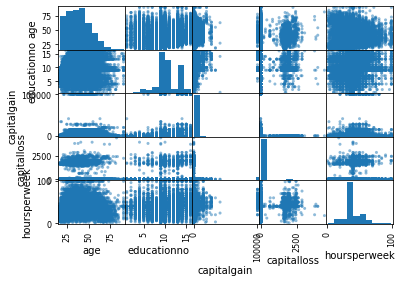

In [43]:
pandas.plotting.scatter_matrix(salary)

[Text(0, 0, 'age'),
 Text(0, 0, 'educationno'),
 Text(0, 0, 'capitalgain'),
 Text(0, 0, 'capitalloss'),
 Text(0, 0, 'hoursperweek')]

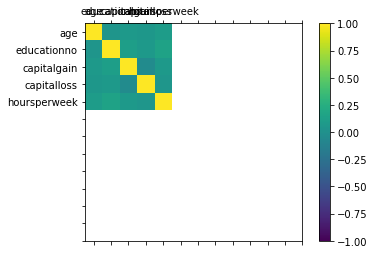

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(salary.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(salary.columns)
ax.set_yticklabels(salary.columns)

In [45]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
results = []
names = []
scoring = []

for name, model in models:
    
    model.fit(X, Y)
    
    predictions = model.predict(X)
    
    
    score = explained_variance_score(Y, predictions)
    mae = mean_absolute_error(predictions, Y)
    
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

LiR: 1.000000 (0.000000)
Ridge: 1.000000 (0.000000)
Lasso: 1.000000 (0.000036)
ElasticNet: 1.000000 (0.000036)
Bag_Re: 0.999978 (0.532154)
RandomForest: 0.999995 (0.301411)
ExtraTreesRegressor: 1.000000 (0.000000)
KNN: 0.999963 (0.774245)
CART: 1.000000 (0.000000)
SVM: 0.057675 (961.962769)
